In [2]:
import numpy as np
import pandas as pd


C:\Users\AvikPathak\AppData\Local\Temp\ipykernel_16408\3269992828.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
df = pd.read_csv('training_data_trainer_refactored.csv')
df.head()

,Session_id,Training_name,Trainer_name,Start_time,End_time,Duration,UserType,Status
0,66190350145643268cbde9e9,SQL,Satyam Pandey S,2024-04-12 09:39:00,2024-04-12 12:29:00,170,Employee,Not Completed
1,66190350145643268cbde9ea,DevOps Operations,Anto Arokia Mary N L,2024-04-12 06:56:00,2024-04-12 07:56:00,60,Intern,Completed
2,66190350145643268cbde9eb,UI / UX Concept Figma,Hariharan N,2024-04-12 10:48:00,2024-04-12 10:51:00,3,Employee,Completed
3,66190350145643268cbde9ec,Git & Version Control,Gayathri G S,2024-04-12 09:43:00,2024-04-12 10:34:00,51,Intern,Completed
4,66190350145643268cbde9ed,Quality Assurance Basics,Sivamalini V,2024-04-12 00:55:00,2024-04-12 00:53:00,-2,Employee,Completed


In [17]:
cols_to_drop = ['Session_id', 'Start_time', 'End_time']

for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

df.head()

,Training_name,Trainer_name,Duration,UserType,Status
0,SQL,Satyam Pandey S,170,Employee,Not Completed
1,DevOps Operations,Anto Arokia Mary N L,60,Intern,Completed
2,UI / UX Concept Figma,Hariharan N,3,Employee,Completed
3,Git & Version Control,Gayathri G S,51,Intern,Completed
4,Quality Assurance Basics,Sivamalini V,-2,Employee,Completed


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['Training_name','Trainer_name','UserType','Status','Trainer_name']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Training_name,Trainer_name,Duration,UserType,Status
0,9,48,170,0,1
1,3,5,60,1,0
2,11,19,3,0,0
3,4,16,51,1,0
4,7,51,-2,0,0


In [19]:
# Split data into features (X) and target variable (y)
X = df.drop([ 'Duration'],axis  = 1)  # Excluding 'START_DATE' and 'END_DATE'
y = df['Duration']
X.head()

,Training_name,Trainer_name,UserType,Status
0,9,48,0,1
1,3,5,1,0
2,11,19,0,0
3,4,16,1,0
4,7,51,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Train LightGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate models
models = [('Linear Regression', linear_pred), ('Gradient Boosting', gb_pred), 
          ('XGBoost', xgb_pred), ('LightGBM', lgbm_pred)]
for name, pred in models:
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 4
[LightGBM] [Info] Start training from score 113.643750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

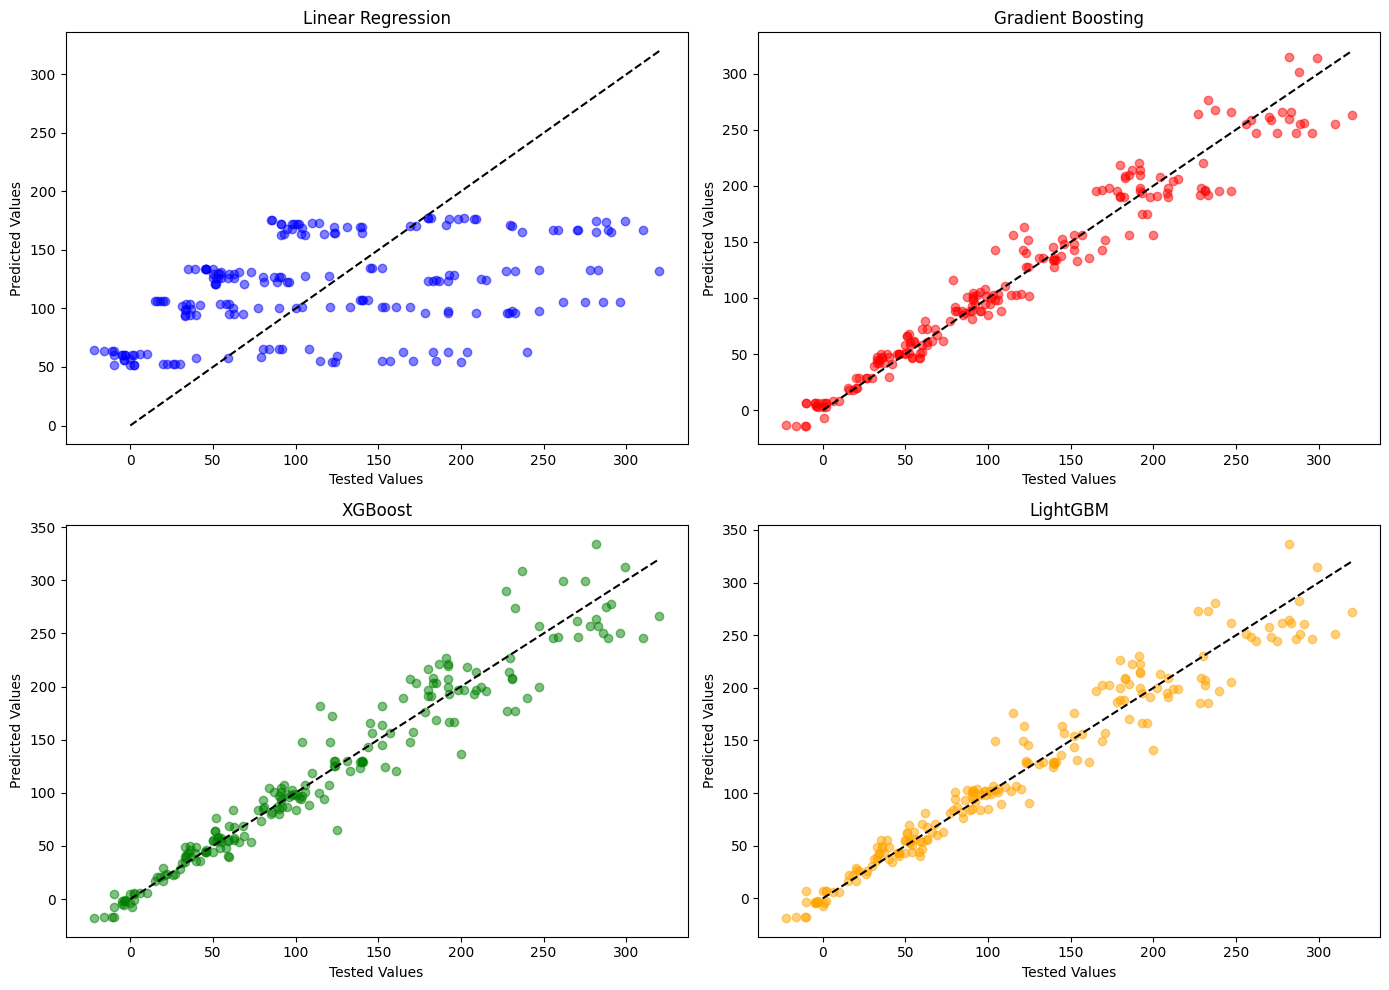

In [22]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Linear Regression
axes[0, 0].scatter(y_test, linear_pred, color='blue', alpha=0.5)
axes[0, 0].plot([0, max(y_test)], [0, max(y_test)], color='black', linestyle='--')
axes[0, 0].set_title('Linear Regression')
axes[0, 0].set_xlabel('Tested Values')
axes[0, 0].set_ylabel('Predicted Values')

# Plot Gradient Boosting
axes[0, 1].scatter(y_test, gb_pred, color='red', alpha=0.5)
axes[0, 1].plot([0, max(y_test)], [0, max(y_test)], color='black', linestyle='--')
axes[0, 1].set_title('Gradient Boosting')
axes[0, 1].set_xlabel('Tested Values')
axes[0, 1].set_ylabel('Predicted Values')

# Plot XGBoost
axes[1, 0].scatter(y_test, xgb_pred, color='green', alpha=0.5)
axes[1, 0].plot([0, max(y_test)], [0, max(y_test)], color='black', linestyle='--')
axes[1, 0].set_title('XGBoost')
axes[1, 0].set_xlabel('Tested Values')
axes[1, 0].set_ylabel('Predicted Values')

# Plot LightGBM
axes[1, 1].scatter(y_test, lgbm_pred, color='orange', alpha=0.5)
axes[1, 1].plot([0, max(y_test)], [0, max(y_test)], color='black', linestyle='--')
axes[1, 1].set_title('LightGBM')
axes[1, 1].set_xlabel('Tested Values')
axes[1, 1].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


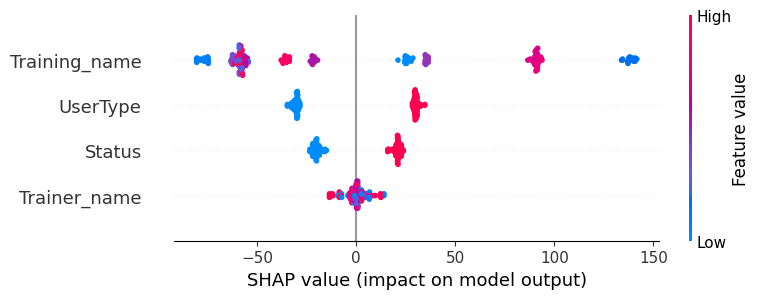

In [23]:
import shap


explainer = shap.Explainer(gb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

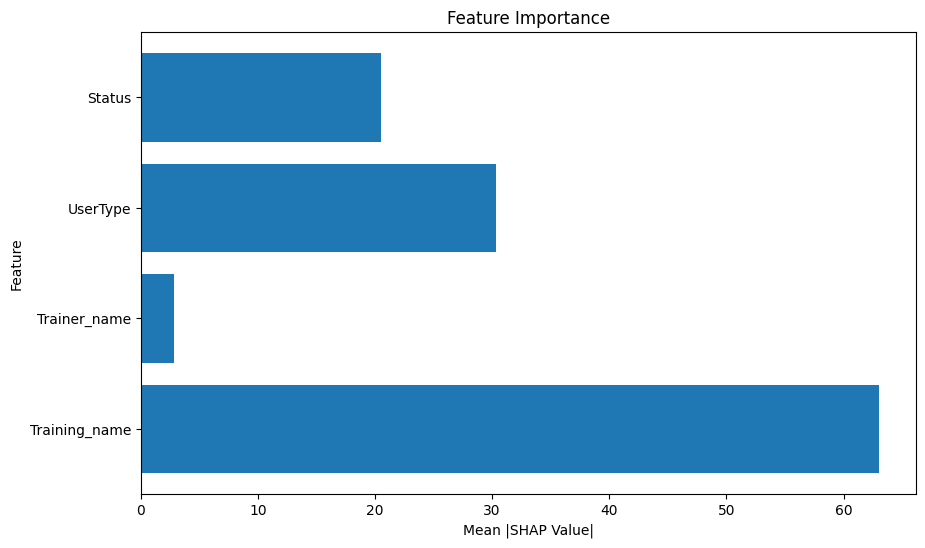

In [24]:
 #Sum the absolute SHAP values across all instances and features
shap_abs_mean = np.abs(shap_values).mean(axis=0)

# Plot the feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns, shap_abs_mean)
plt.xlabel('Mean |SHAP Value|')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()